# "Standing Waves on a String"

The goal of this project was to create the motion of standing waves on a string given a resonant frequency. 

In this case, waves of wavelength $\lambda_n=2L/n$ reflect contructively off of each end of the string, producing a spiral pattern. If you drive one end of the string at a resonant frequency, you can create a standing wave. One way to create this is by using the equation:

$$\omega=\frac{n\pi v}{L}\,,$$

where $n$ is a positive integer.

These driving terms are going to come in the form of sine and cosine waves given by $$y(0,t)=y_0\sin(\omega t)\qquad\mbox{and}\qquad v_y(0,t)=y_0\omega\cos(\omega t)\,.$$

There is a problem when this is done, however. The amplitude of the wave grows without limit when driven at a resonant frequency. This is a feature of the wave equation itself. 

The first task to see this in action is simulate the string with a certain length and wave speed. the amplitude is set so that it does not reach the resonance. A method called the Crank-Nicolson is used to create this waveshape. It is given as:

$$\frac{y(x, t+h) - y(x,t)}{h}=\tfrac12\big[f(x, t) + f(x, t+h)\big]$$

where there is a step size added to the overall shape for every value of displacement that this string is going to be at from equilibrium position. 

Using this method, the string was first plotted to show all possible positons as once, with ampitudes present. Here are the imports used:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
from scipy.fftpack import dst, idst
import IPython.display as display

In [2]:
L, v, N = 1, 10, 100
a = 10**(-2)
x = np.linspace(0, L, N + 1)

h = 1e-3
time = np.arange(0, 10, h)
y0 = 0.01
v = 10
w = 3*np.pi*v/L
y = np.zeros(N + 1)
vy = 0.01*w*np.ones(N + 1)

c = 0.25*h**2*v**2/a**2
A2 = -c
A1 = 1 + 2*c

A = np.empty((3, N - 1))
A[0] = A2
A[1] = A1
A[2] = A2

waveshape = [] #list hold waveshape
for i, t in enumerate(time):
    waveshape.append(y.copy())
    yold = y.copy()
    vyold = vy.copy()
    y[0] = 0.01*np.sin(w*t)
    vy[0] = y0*w*np.cos(w*t)
    b = c*y[:-2]+(1-2*c)*y[1:-1]+c*y[2:]+h*vy[1:-1] #employs use of the Crank-Nicloson Method
    y[1:N] = solve_banded((1,1), A, b) 
    vy[1:-1]+=2*c/h*(y[:-2]+y[2:]-2*y[1:-1]+yold[:-2]+yold[2:]-2*yold[1:-1])

wave_part1 = y


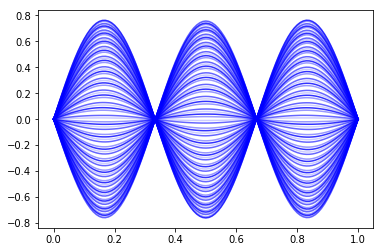

In [3]:
y = np.linspace(0, L, 101)

for i in range(0, len(waveshape)//100):
    plt.plot(y, waveshape[100*i], alpha = 0.2*(i%5), color = "blue")


This particular shape of the string was plotted for every 1/10th of a second for 10 seconds. From this, one can easily see that despite only given 10 seconds to grow, the wave took the shape of something that is clearly headed for resonance. 

A more realistic treatment of this system is to introduce a damping term to this wave equation so that it recedes over time. This is given by the equation:

$$\frac{\partial^2y}{\partial t^2}=v^2\frac{\partial^2 y}{\partial x^2} - b\frac{\partial y}{\partial t}\,,$$

where $b$ is the damping coefficient

For this next plot, $b$ will be set to $10^{-6}$ m$^2$s$^{-2}$. This graph will look different enough to notice that there are different wave quations being used in their respective plots. 

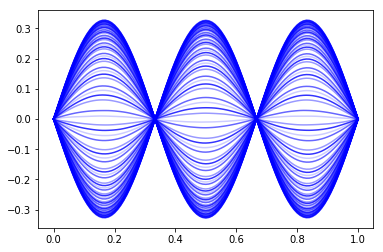

In [4]:
L, v, N = 1, 10, 100
a = 10**-2
x = np.linspace(0, L, N + 1)
bd = 10**-6
h = 1e-3
time = np.arange(0, 10, h)
y0 = 0.01
v = 10
w = 3*np.pi*v/L
y = np.zeros(N + 1)
vy = 0.01*w*np.ones(N + 1)

c = 0.25*h**2*v**2/a**2
A2 = -c
A1 = 1 + 2*c

A = np.empty((3, N - 1))
A[0] = A2
A[1] = A1
A[2] = A2

wave2 = []
for i, t in enumerate(time):
    wave2.append(y.copy())
    yold = y.copy()
    vold = vy.copy()
    y[0] = 0.01*np.sin(w*t)
    vy[0] = y0*w*np.cos(w*t)
    b = c*y[:-2]+(1-2*c)*y[1:-1]+c*y[2:]+h*vy[1:-1]-c*bd*vy[1:-1]
    y[1:N] = solve_banded((1,1), A, b)
    vy[1:-1]+=2*c/h*(y[:-2]+y[2:]-2*y[1:-1]+yold[:-2]+yold[2:]-2*yold[1:-1]-bd*vy[1:-1])

wave_part2 = y

y = np.arange(0, L, a)

for i in range(len(wave2)//100):
    plt.plot(x, wave2[100*i], alpha = 0.2*(i%5), color = "blue")
    

# To Summarize:

In this project, standing waves were created for a specific resonant frequency the usage of array and concepts in linear algebra were shown in their relation to programming and